# AtliQ Hospitality - Full EDA

In [12]:
pip install pandas numpy matplotlib seaborn

   ---------------------------------------- 0.0/8.1 MB ? eta -:--:--
   ------- -------------------------------- 1.6/8.1 MB 8.4 MB/s eta 0:00:01
   ---------- ----------------------------- 2.1/8.1 MB 5.6 MB/s eta 0:00:02
   ----------- ---------------------------- 2.4/8.1 MB 4.2 MB/s eta 0:00:02
   ------------ --------------------------- 2.6/8.1 MB 2.9 MB/s eta 0:00:02
   ------------------- -------------------- 3.9/8.1 MB 3.6 MB/s eta 0:00:02
   --------------------------- ------------ 5.5/8.1 MB 4.4 MB/s eta 0:00:01
   ------------------------------------ --- 7.3/8.1 MB 4.9 MB/s eta 0:00:01
   ---------------------------------------- 8.1/8.1 MB 4.8 MB/s eta 0:00:00
   ---------------------------------------- 0.0/2.3 MB ? eta -:--:--
   --------------------------- ------------ 1.6/2.3 MB 7.6 MB/s eta 0:00:01
   ---------------------------------------- 2.3/2.3 MB 5.7 MB/s eta 0:00:00
   ---------------------------------------- 0.0/7.0 MB ? eta -:--:--
   -------- ---------------------

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.

[notice] A new release of pip is available: 24.2 -> 26.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sqlite3
print('all imported buddy 😇')

all imported buddy 😇



## 1. Load Data


In [17]:
dim_date = pd.read_csv("C:/Users/AKBAR/OneDrive/Desktop/Atliq project/Data/dim_date.csv")

dim_hotels = pd.read_csv("C:/Users/AKBAR/OneDrive/Desktop/Atliq project/Data/dim_hotels.csv")

dim_rooms = pd.read_csv("C:/Users/AKBAR/OneDrive/Desktop/Atliq project/Data/dim_rooms.csv")

fact_bookings = pd.read_csv("C:/Users/AKBAR/OneDrive/Desktop/Atliq project/Data/fact_bookings.csv")

fact_aggregated = pd.read_csv("C:/Users/AKBAR/OneDrive/Desktop/Atliq project/Data/fact_aggregated_bookings.csv")

print("All datasets loaded successfully ✅")

All datasets loaded successfully ✅


## 2. Basic Info

In [25]:
datasets = {
    "dim_date": dim_date,
    "dim_hotels": dim_hotels,
    "dim_rooms": dim_rooms,
    "fact_bookings": fact_bookings,
    "fact_aggregated": fact_aggregated
}

for name, df in datasets.items():
    print(f"\n{name} shape:", df.shape)
    print(df.info())
    print(df.isnull().sum())


dim_date shape: (92, 4)
<class 'pandas.DataFrame'>
RangeIndex: 92 entries, 0 to 91
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   date      92 non-null     str  
 1   mmm yy    92 non-null     str  
 2   week no   92 non-null     str  
 3   day_type  92 non-null     str  
dtypes: str(4)
memory usage: 3.0 KB
None
date        0
mmm yy      0
week no     0
day_type    0
dtype: int64

dim_hotels shape: (25, 4)
<class 'pandas.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   property_id    25 non-null     int64
 1   property_name  25 non-null     str  
 2   category       25 non-null     str  
 3   city           25 non-null     str  
dtypes: int64(1), str(3)
memory usage: 932.0 bytes
None
property_id      0
property_name    0
category         0
city             0
dtype: int64

dim_rooms shape: (4, 2)
<class 'pand

## 3. Data Cleaning

In [26]:
fact_bookings.drop_duplicates(inplace=True)
fact_bookings.fillna(0, inplace=True)

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized
0,May012216558RT11,16558,2022-04-27,2022-05-01,2022-05-02,3,RT1,direct online,1.0,Checked Out,10010,10010
1,May012216558RT12,16558,2022-04-30,2022-05-01,2022-05-02,2,RT1,others,0.0,Cancelled,9100,3640
2,May012216558RT13,16558,2022-04-28,2022-05-01,2022-05-04,2,RT1,logtrip,5.0,Checked Out,9100,9100
3,May012216558RT14,16558,2022-04-28,2022-05-01,2022-05-02,2,RT1,others,0.0,Cancelled,9100,3640
4,May012216558RT15,16558,2022-04-27,2022-05-01,2022-05-02,4,RT1,direct online,5.0,Checked Out,10920,10920
...,...,...,...,...,...,...,...,...,...,...,...,...
134585,Jul312217564RT46,17564,2022-07-29,2022-07-31,2022-08-03,1,RT4,makeyourtrip,2.0,Checked Out,32300,32300
134586,Jul312217564RT47,17564,2022-07-30,2022-07-31,2022-08-01,4,RT4,logtrip,2.0,Checked Out,38760,38760
134587,Jul312217564RT48,17564,2022-07-30,2022-07-31,2022-08-02,1,RT4,tripster,0.0,Cancelled,32300,12920
134588,Jul312217564RT49,17564,2022-07-29,2022-07-31,2022-08-01,2,RT4,logtrip,2.0,Checked Out,32300,32300


## 4. Merge All Tables Properly

In [40]:

# 1️⃣ Merge fact_bookings with dim_hotels
merged = fact_bookings.merge(
    dim_hotels,
    on="property_id",
    how="left"
)

# 2️⃣ Merge with dim_rooms
merged = merged.merge(
    dim_rooms,
    left_on="room_category",
    right_on="room_id",
    how="left"
)

# 3️⃣ Merge with dim_date
merged = merged.merge(
    dim_date,
    left_on="check_in_date",
    right_on="date",
    how="left"
)

# 4️⃣ Merge with fact_aggregated_bookings
merged = merged.merge(
    fact_aggregated,
    on=["property_id", "check_in_date", "room_category"],
    how="left"
)

print("Final Merged Dataset Shape:", merged.shape)

Final Merged Dataset Shape: (134590, 23)


## 6. KPI Summary

In [43]:
merged["Revenue"] = merged["revenue_realized"]

merged["Cancellation_Flag"] = np.where(
    merged["booking_status"] == "Cancelled", 1, 0
)

merged["Successful_Flag"] = np.where(
    merged["booking_status"] == "Checked Out", 1, 0
)

In [44]:
print("\n===== KPI SUMMARY =====")
print("Total Revenue:", merged["Revenue"].sum())
print("Total Bookings:", merged.shape[0])
print("Total Cancellations:", merged["Cancellation_Flag"].sum())


===== KPI SUMMARY =====
Total Revenue: 1708771229
Total Bookings: 134590
Total Cancellations: 33420


## 7. City Level Analysis

In [45]:
city_revenue = (
    merged.groupby("city")["Revenue"]
    .sum()
    .sort_values(ascending=False)
)

print("\nRevenue by City\n", city_revenue)


Revenue by City
 city
Mumbai       668640991
Bangalore    420397050
Hyderabad    325232870
Delhi        294500318
Name: Revenue, dtype: int64


## Feature Engineering (Stable Version)

In [48]:

# Revenue (already exists in fact_bookings)
merged["Revenue"] = merged["revenue_realized"]

# Cancellation Flag
merged["Cancellation_Flag"] = np.where(
    merged["booking_status"] == "Cancelled", 1, 0
)

# Successful Booking Flag
merged["Successful_Flag"] = np.where(
    merged["booking_status"] == "Checked Out", 1, 0
)

# Cancellation Rate per record (optional)
merged["Cancellation_Rate"] = merged["Cancellation_Flag"]

## 8. Room Category Analysis

In [49]:
room_analysis = (
    merged.groupby("room_class")
    .agg(
        Total_Revenue=("Revenue", "sum"),
        Cancellation_Rate=("Cancellation_Flag", "mean")
    )
)

print(room_analysis)

              Total_Revenue  Cancellation_Rate
room_class                                    
Elite             560271204           0.249611
Premium           462166344           0.248806
Presidential      376752786           0.244385
Standard          309580895           0.247880


## 9. Monthly Revenue Trend

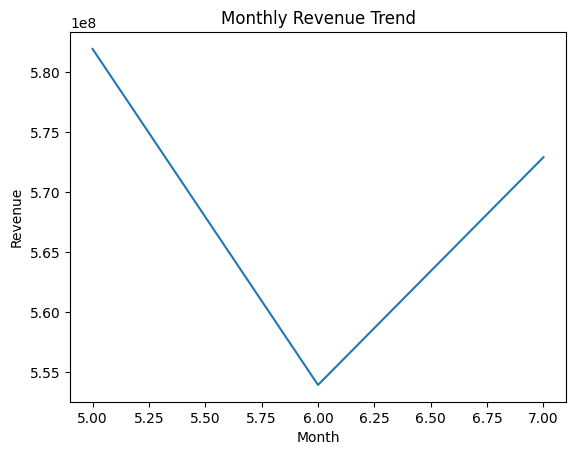

In [52]:
merged["check_in_date"] = pd.to_datetime(merged["check_in_date"])

merged["Month"] = merged["check_in_date"].dt.month

monthly_revenue = (
    merged.groupby("Month")["Revenue"]
    .sum()
    .sort_index()
)

plt.figure()
monthly_revenue.plot()
plt.title("Monthly Revenue Trend")
plt.xlabel("Month")
plt.ylabel("Revenue")
plt.show()

## 10. Save Cleaned Data

In [54]:
merged.to_csv(
    "C:/Users/AKBAR/OneDrive/Desktop/Atliq project/atliq_cleaned_data.csv",
    index=False
)

## 11. Export to SQLite

In [56]:
import os
import sqlite3

# Create SQL folder path
db_path = "C:/Users/AKBAR/OneDrive/Desktop/Atliq project/SQL/atliq_hospitality.db"

conn = sqlite3.connect(db_path)

merged.to_sql(
    "atliq_analysis",
    conn,
    if_exists="replace",
    index=False
)

conn.close()

print("Database saved successfully inside SQL folder ✅")

Database saved successfully inside SQL folder ✅
